# Aula 1 - Criando um gerador

## Vídeo 1.2 - Carregando o fmnist

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Carregar o dataset Fashion MNIST
(train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar as imagens para o intervalo [-1, 1]
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalizar para [-1, 1]

# Definir o batch size e preparar o dataset para treinamento
batch_size = 256

# Criar o dataset de treino
train_ds = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

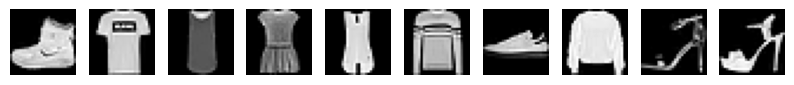

In [5]:
# Exibir algumas imagens de exemplo
num_images_to_show = 10
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

## Vídeo 1.3 - Estruturando um gerador

In [6]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

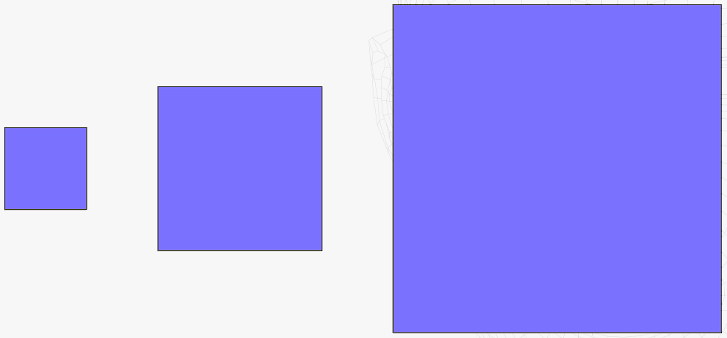

In [8]:
def constroi_gerador():
    modelo = Sequential()

    modelo.add(layers.Input(shape=(100,)))
    modelo.add(layers.Dense(7*7*256, use_bias=False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Reshape((7, 7, 256)))
    modelo.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return modelo


## Vídeo 1.4 - Gerando uma imagem

In [9]:
# Criação do gerador
gerador = constroi_gerador()

In [10]:
# Gerar Vetor de Ruído
dimensao_ruido = 100
ruido = tf.random.normal([1, dimensao_ruido])

In [11]:
# Gerar imagem a partir do vetor de ruído
imagem_gerada = gerador(ruido, training=False)

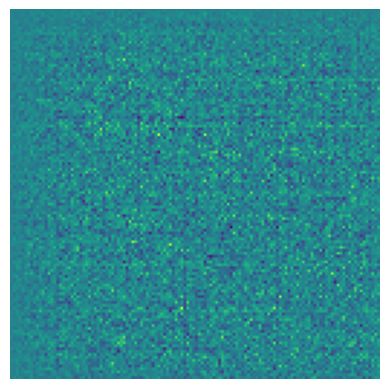

In [16]:
# Visualizar a imagem gerada
import matplotlib.pyplot as plt
plt.imshow((imagem_gerada[0] * 127.5 + 127.5).numpy())
plt.axis('off')
plt.show()